# AI LAB 3                                       k200353               Mohsin Ali Mirza

### ------------------------------------------------------------------------------------------------------

## Libraries 

In [ ]:
import numpy as np
import random as rd
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Task 1

In [ ]:
#Global Values
gridSize = np.array([10,10])
CameraPos = np.array([4,0])

Camera = 2
Agent = 1

AgentPos = np.array([1,1])
environment = np.zeros((gridSize[0],gridSize[1]))
environment[CameraPos[0]][CameraPos[1]] = Camera

In [ ]:
#Methods Used
def vizualizeEnvironment():
    plt.imshow(environment)
    x = [CameraPos[1],AgentPos[1]]
    y = [CameraPos[0],AgentPos[0]]
    plt.plot(x, y, color="#76EEC6", linewidth=3)
    
    ax = plt.gca()
    
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    
        # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

    # Remove minor ticks
    ax.tick_params(which='minor', bottom=False, left=False)
    
    plt.show()
    return

def displayEnvironment():
    for x in environment:  # outer loop  
        for i in x:  # inner loop  
            print(i, end = " ") # print the elements  
        print() 
    return

def randomlyMove():
    environment[AgentPos[0]][AgentPos[1]] = 0
    AgentPos[0] = rd.randint(0,gridSize[0]-1)
    AgentPos[1] = rd.randint(0,gridSize[1]-1)
    if(AgentPos[0]==CameraPos[0] and AgentPos[1]==CameraPos[0]):
        randomlyMove()
    environment[AgentPos[0]][AgentPos[1]] = Agent
    return

def calDistance():
    return np.linalg.norm(CameraPos - AgentPos)


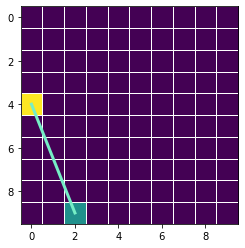

Distance Between Camera And Agent 5.385164807134504


In [ ]:
for i in range(10):
    randomlyMove()
    clear_output(wait=True)
    vizualizeEnvironment()
    print("Distance Between Camera And Agent",calDistance())
    time.sleep(1)

## Task 2

In [ ]:
#Global Values
gridSize = np.array([11,3])

#Parking = 3
Obstacle = 2
Agent = 1


ObstaclePos = np.array([0,0])
AgentPos = np.array([10,1])
#ParkingPos = np.array([])

environment = np.zeros((gridSize[0],gridSize[1]))

In [ ]:
#Methods For Display
def vizualizeEnvironment():
    plt.imshow(environment)
    x = [ObstaclePos[1],AgentPos[1]]
    y = [ObstaclePos[0],AgentPos[0]]
    plt.plot(x, y, color="#76EEC6", linewidth=3)
    
    ax = plt.gca()
    
    ax.set_xticks(np.arange(-.5, 3, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    
        # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

    # Remove minor ticks
    ax.tick_params(which='minor', bottom=False, left=False)
    
    plt.show()
    return

In [ ]:
#Methods For Obstacle Spawns
def isObstacleAtAgentPos():
    if(ObstaclePos[0]==AgentPos[0] and ObstaclePos[1]==AgentPos[1]):
        return True
    else:
        return False
    
def isObstacleAtNegativeBounds():
    if(ObstaclePos[0]==-1 or ObstaclePos[1]==-1):
        return True
    else:
        return False

def randomObstaclePos():
    environment[ObstaclePos[0]][ObstaclePos[1]] = 0
    
    ObstaclePos[0] = (rd.randint(0,gridSize[0])-1)
    ObstaclePos[1] = (rd.randint(0,gridSize[1])-1)
    
    if(isObstacleAtAgentPos() or isObstacleAtNegativeBounds()):
        randomObstaclePos()
        
    environment[ObstaclePos[0]][ObstaclePos[1]] = Obstacle
    return

def setObstaclePos(a,b):
    
    environment[ObstaclePos[0]][ObstaclePos[1]] = 0
    
    ObstaclePos[0] = a
    ObstaclePos[1] = b
    
    
    environment[ObstaclePos[0]][ObstaclePos[1]] = Obstacle
    return;

In [ ]:
#Methods Used For Agent
def setAgentPos(a,b):
    environment[AgentPos[0]][AgentPos[1]] = 0
    AgentPos[0]=a
    AgentPos[1] =b
    environment[AgentPos[0]][AgentPos[1]] = Agent

def calDistance():
    return np.linalg.norm(ObstaclePos - AgentPos)

def obstacleIsLeft():
    return bool(AgentPos[1]>ObstaclePos[1])

def slowDown():
    print("Slow Down")
    while(calDistance()>=3):
        AgentPos[0] = AgentPos[0]-1;
    return

def isThereAWall():
    if(obstacleIsLeft() and AgentPos[1]==gridSize[1]-1):
        return True
    if(obstacleIsLeft()==False and AgentPos[1] == 0):
        return True
    return False

def moveCar():
    environment[AgentPos[0]][AgentPos[1]] = 0
    
    moveRight = 0
    moveLeft = 0
    print(calDistance())
    
    if(calDistance()>=8 and calDistance()<=9):
        print("Apply Breaks")
        
    
    if(calDistance()>=2 and calDistance()<=3):
        if(obstacleIsLeft()):
            print("Obstacle At Left")
            if(isThereAWall()):
                print("There is a Wall")
            else:
                moveLeft = 1
  
        else:
            print("Obstacle At Right")
            if(isThereAWall()):
                print("There is a Wall")
            else:
                moveRight = 1
        
        if(moveRight):
            AgentPos[1] = AgentPos[1]-1
        if(moveLeft):
            AgentPos[1] = AgentPos[1]+1
            
    AgentPos[0] = AgentPos[0]-1;
        
    environment[AgentPos[0]][AgentPos[1]] = Agent
    return

In [ ]:
#End State
def notAtEnd():
    return bool(AgentPos[0]!=0)

Parking


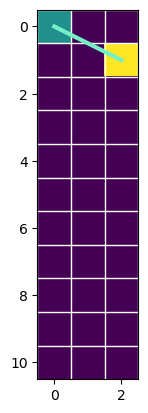

In [ ]:
randomObstaclePos()
gridSize = np.array([11,3])
setAgentPos(10,0)
while(notAtEnd()):
    clear_output(wait=True)
    moveCar()
    vizualizeEnvironment()
    time.sleep(1)
clear_output(wait=True)
print("Parking")
vizualizeEnvironment()

#There might be 1 or 2 bugs i.e when the obstacle and the player is in the same lane but will be fixed in the future

# Task 3

In [ ]:
import statistics as sc
sensorCount = 9

temperature=[]
for i in range(sensorCount):
    temp = rd.randint(-30,42)
    temperature.append(temp)
    
    
averageTemperature = sc.mean(temperature)
print("Temperatures : " + str(temperature))
print("Average Temperature: " + str(averageTemperature))

Temperatures : [29, -22, -6, 34, 10, -11, -26, 29, 24]
Average Temperature: 6.777777777777778


## Task 5

In [ ]:
import numpy as np
import random as rd
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
#Global Values
gridSize = np.array([4,4])
AgentPos = np.array([0,0])

Obstacle = 2
Agent = 1

environment = np.zeros((gridSize[0],gridSize[1]))

In [ ]:
#Methods For Display
def vizualizeEnvironment():
    plt.imshow(environment)
    
    ax = plt.gca()
    
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
    
        # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

    # Remove minor ticks
    ax.tick_params(which='minor', bottom=False, left=False)
    
    plt.show()
    return 

In [ ]:
#Methods For Blocks
#def checkOverlapWithPlayer():
    #return bool(==AgentPos[0] and ==AgentPos[1])
def randomPositions():
    ObstaclePos = np.empty((0, 2), dtype=int)
    for i in range(10):
        x = (rd.randint(0,gridSize[0])-1)
        y = (rd.randint(0,gridSize[1])-1)
        
        while(x==AgentPos[0] and x==AgentPos[1] or x==-1 or y==-1):
            x = (rd.randint(0,gridSize[0])-1)
            y = (rd.randint(0,gridSize[1])-1)
            
        ObstaclePos = np.append(ObstaclePos, [[x, y]], axis=0)
    return ObstaclePos

def colorObjects(ObstaclePos):
    for i in range(10):
        environment[ObstaclePos[i,0]][ObstaclePos[i,1]] = Obstacle
    return

def isThereAnObject(pos,ObstaclePos):
    for i in range(10):
        if(ObstaclePos[i,0]==pos[0] and ObstaclePos[i,1]==pos[1]):
            return True
    return False

In [ ]:
#Methods For Agent
def setAgentPos(a,b):
    environment[AgentPos[0]][AgentPos[1]] = 0
    AgentPos[0]=a
    AgentPos[1] =b
    
    return


def moveAgent(ObstaclePos,row,col):
    if(col>=gridSize[1] or col<0 or row>=gridSize[0] or row<0):
        return
    if(environment[row,col]==1 or environment[row,col]==2):
        return
    
    if(col==gridSize[1] and row==gridSize[0]):
        print("Return")
        return
    
    environment[row,col]=1
    
    #Move Down
    print("Move Down")
    moveAgent(ObstaclePos,row+1,col)
    
     #Move Left
    print("Move Left")
    environment[row,col] = Agent
    moveAgent(ObstaclePos,row,col-1)
    
    #Move Right
    print("Move Right")
    moveAgent(ObstaclePos,row,col+1)
        
    #Move Up
    print("Move Up")
    moveAgent(ObstaclePos,row-1,col)
        
    environment[row,col] = Agent
    
    return

Intial State


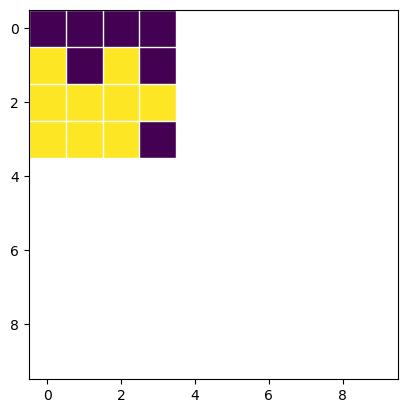

After State
Move Down
Move Down
Move Left
Move Right
Move Up
Move Left
Move Down
Move Left
Move Right
Move Up
Move Right
Move Down
Move Left
Move Right
Move Down
Move Down
Move Left
Move Right
Move Up
Move Left
Move Right
Move Up
Move Up
Move Up


In [ ]:
ObstaclePos = randomPositions()
colorObjects(ObstaclePos)
setAgentPos(0,1)
print("Intial State")
vizualizeEnvironment()
print("After State")
moveAgent(ObstaclePos,AgentPos[0],AgentPos[1])
    

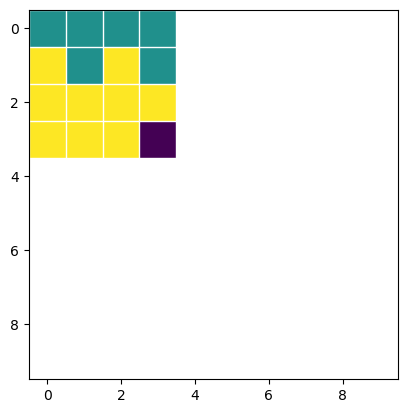

In [ ]:
vizualizeEnvironment()

## Task 6

In [ ]:
class TicTacToe:
    def __init__(self):
        self.board = [" " for x in range(9)]
        self.player = "X"

    def display_board(self):
        row1 = "| {} | {} | {} |".format(self.board[0], self.board[1], self.board[2])
        row2 = "| {} | {} | {} |".format(self.board[3], self.board[4], self.board[5])
        row3 = "| {} | {} | {} |".format(self.board[6], self.board[7], self.board[8])

        print()
        print(row1)
        print(row2)
        print(row3)

    def player_move(self):
        print("Player {} turn.".format(self.player))
        choice = int(input("Enter your move (1-9): ").strip())
        if self.board[choice - 1] == " ":
            self.board[choice - 1] = self.player
        else:
            print("That space is already taken.")
            self.player_move()

    def check_for_winner(self):
        winning_combinations = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  # rows
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  # columns
            [0, 4, 8], [2, 4, 6]  # diagonals
        ]

        for combination in winning_combinations:
            if self.board[combination[0]] == self.board[combination[1]] == self.board[combination[2]] != " ":
                return self.board[combination[0]]

        if " " not in self.board:
            return "Tie"

        return None

    def minimax(self, player):
        result = self.check_for_winner()

        if result is not None:
            if result == "X":
                return -1
            elif result == "O":
                return 1
            else:
                return 0

        if player == "X":
            best = [None, -2]
            for i in range(9):
                if self.board[i] == " ":
                    self.board[i] = "X"
                    score = self.minimax("O")
                    self.board[i] = " "
                    if score > best[1]:
                        best = [i, score]
        else:
            best = [None, 2]
            for i in range(9):
                if self.board[i] == " ":
                    self.board[i] = "O"
                    score = self.minimax("X")
                    self.board[i] = " "
                    if score < best[1]:
                        best = [i, score]

        return best[1]

    def computer_move(self):
        print("Computer turn.")
        move = self.minimax("O")
        print(move)
        if move == 1:
            for i in range(9):
                if self.board[i] == " ":
                    self.board[i] = "O"
                    if self.check_for_winner() == "O":
                        print("Computer chooses {}".format(i + 1))
                        return
                    self.board[i] = " "

        elif move == -1:
            for i in range(9):
                if self.board[i] == " ":
                    self.board[i] = "X"
                    if self.check_for_winner() == "X":
                        self.board[i] = "O"
                        print("Computer chooses {}".format(i + 1))
                        return
                    self.board[i] = " "

        for i in range(9):
            if self.board[i] == " ":
                self.board[i] = "O"
                print("Computer chooses {}".format(i + 1))
                break

game = TicTacToe()
while True:
    game.display_board()
    game.player_move()
    result = game.check_for_winner()
    if result is not None:
        game.display_board()
        if result == "Tie":
            print("Tie game.")
        else:
            print("{} wins!".format(result))
        break
    game.computer_move()
    result = game.check_for_winner()
    if result is not None:
        game.display_board()
        if result == "Tie":
            print("Tie game.")
        else:
            print("{} wins!".format(result))
        break



|   |   |   |
|   |   |   |
|   |   |   |
Player X turn.
Enter your move (1-9): 5
Computer turn.
0
Computer chooses 1

| O |   |   |
|   | X |   |
|   |   |   |
Player X turn.
Enter your move (1-9): 5
That space is already taken.
Player X turn.
Enter your move (1-9): 3
Computer turn.
-1
Computer chooses 7

| O |   | X |
|   | X |   |
| O |   |   |
Player X turn.
Enter your move (1-9): 4
Computer turn.
-1
Computer chooses 6

| O |   | X |
| X | X | O |
| O |   |   |
Player X turn.


## Task 7

In [ ]:
#For this task this should be run on Collab

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node('FAST')
G.add_node('karsaz')
G.add_node('gulshun')
G.add_node('korangi')
G.add_node('sadar')

G.add_edge('FAST', 'karsaz', weight=15)
G.add_edge('FAST', 'gulshun', weight=30)
G.add_edge('FAST', 'korangi', weight=20)
G.add_edge('karsaz', 'korangi', weight=10)
G.add_edge('karsaz', 'gulshun', weight=8)
G.add_edge('karsaz', 'sadar', weight=10)
G.add_edge('gulshun', 'sadar', weight=20)
G.add_edge('sadar', 'korangi', weight=10)

path = nx.dijkstra_path(G, 'FAST', 'korangi', weight='weight')
print(path)

path_length = nx.dijkstra_path_length(G, 'FAST', 'korangi', weight='weight')
print(path_length)

['FAST', 'korangi']
20


## Task 8

Reinforcement learning can be applied to various problems, including computer vs player Tic Tac Toe, vacuum cleaning, and finding the shortest path. Here's how you can apply reinforcement learning to these problems:

Computer vs Player Tic Tac Toe: In this problem, the computer can be treated as an agent that makes decisions based on the current state of the game. The agent can receive rewards for winning the game, losing the game, or tying the game. The agent can learn through trial and error to choose the best moves based on the rewards received.

Vacuum Cleaner: In this problem, the vacuum cleaner can be treated as an agent that makes decisions based on its current location and the state of the environment. The agent can receive rewards for cleaning up dirt and moving to different locations. The agent can learn through trial and error to choose the best actions based on the rewards received.

Shortest Path: In this problem, the agent can be treated as a vehicle that moves from one location to another. The agent can receive rewards for reaching its destination quickly and efficiently. The agent can learn through trial and error to choose the best path based on the rewards received.

In all these problems, reinforcement learning algorithms such as Q-Learning, SARSA, and Deep Reinforcement Learning can be applied to learn the best policies for the agent to follow. These algorithms work by updating the agent's policy based on the rewards received for taking certain actions in a particular state of the environment. Over time, the agent can learn to make better decisions and achieve its goals more effectively.